In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats.mstats import gmean

In [2]:
url = "https://raw.githubusercontent.com/charleyferrari/CUNY_DATA608/master/lecture4/Data/riverkeeper_data_2013.csv"
df = pd.read_csv(url)
print df.dtypes
df.head(25)

Site                 object
Date                 object
EnteroCount          object
FourDayRainTotal    float64
SampleCount           int64
dtype: object


,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35
5,Hudson above Mohawk River,6/4/2013,238,1.2,35
6,Hudson above Mohawk River,10/15/2012,23,1.4,35
7,Hudson above Mohawk River,9/15/2012,11,0.1,35
8,Hudson above Mohawk River,8/18/2012,15,0.3,35
9,Hudson above Mohawk River,7/21/2012,6,0.2,35


In [3]:
#Data cleansing
#Redefine data types
df["Site"] = df["Site"].astype("category")
df["Date"] = pd.to_datetime(df["Date"])

#Remove "<" from EnteroCount
df["EnteroCount"] = df["EnteroCount"].str.replace('[^\w\s]','').astype('int64')

print df.dtypes

Site                      category
Date                datetime64[ns]
EnteroCount                  int64
FourDayRainTotal           float64
SampleCount                  int64
dtype: object


- Create lists & graphs of the best and worst places to swim in the dataset.

In [4]:
print "Ten Best Places to Swim"
mean1 = df.groupby(['Site'])['EnteroCount'].mean().sort_values().reset_index()
best_ten = pd.DataFrame(mean1.head(10))
best_ten


Ten Best Places to Swim


,Site,EnteroCount
0,Poughkeepsie Drinking Water Intake,8.342105
1,Croton Point Beach,15.458333
2,Stony Point mid-channel,17.340909
3,Little Stony Point,17.526316
4,Poughkeepsie Launch Ramp,17.675676
5,Haverstraw Bay mid-channel,18.708333
6,TZ Bridge mid-channel,21.438596
7,Cold Spring Harbor,22.542857
8,Yonkers mid-channel,25.019231
9,Irvington Beach,28.805556


In [5]:
print "Ten Worst Places to Swim"
mean2 = df.groupby(['Site'])['EnteroCount'].mean().sort_values(ascending=False).reset_index()
worst_ten = pd.DataFrame(mean2.head(10))
worst_ten

Ten Worst Places to Swim


,Site,EnteroCount
0,Gowanus Canal,4206.837838
1,Newtown Creek- Metropolitan Ave. Bridge,2953.684211
2,Tarrytown Marina,2205.666667
3,Saw Mill River,1455.760000
4,Upper Sparkill Creek,1296.072727
5,Newtown Creek- Dutch Kills,1205.087719
6,Kingsland Pt. Park- Pocantico River,907.857143
7,Orangetown STP Outfall,854.192982
8,Mohawk River at Waterford,621.057143
9,Piermont Pier,482.165775


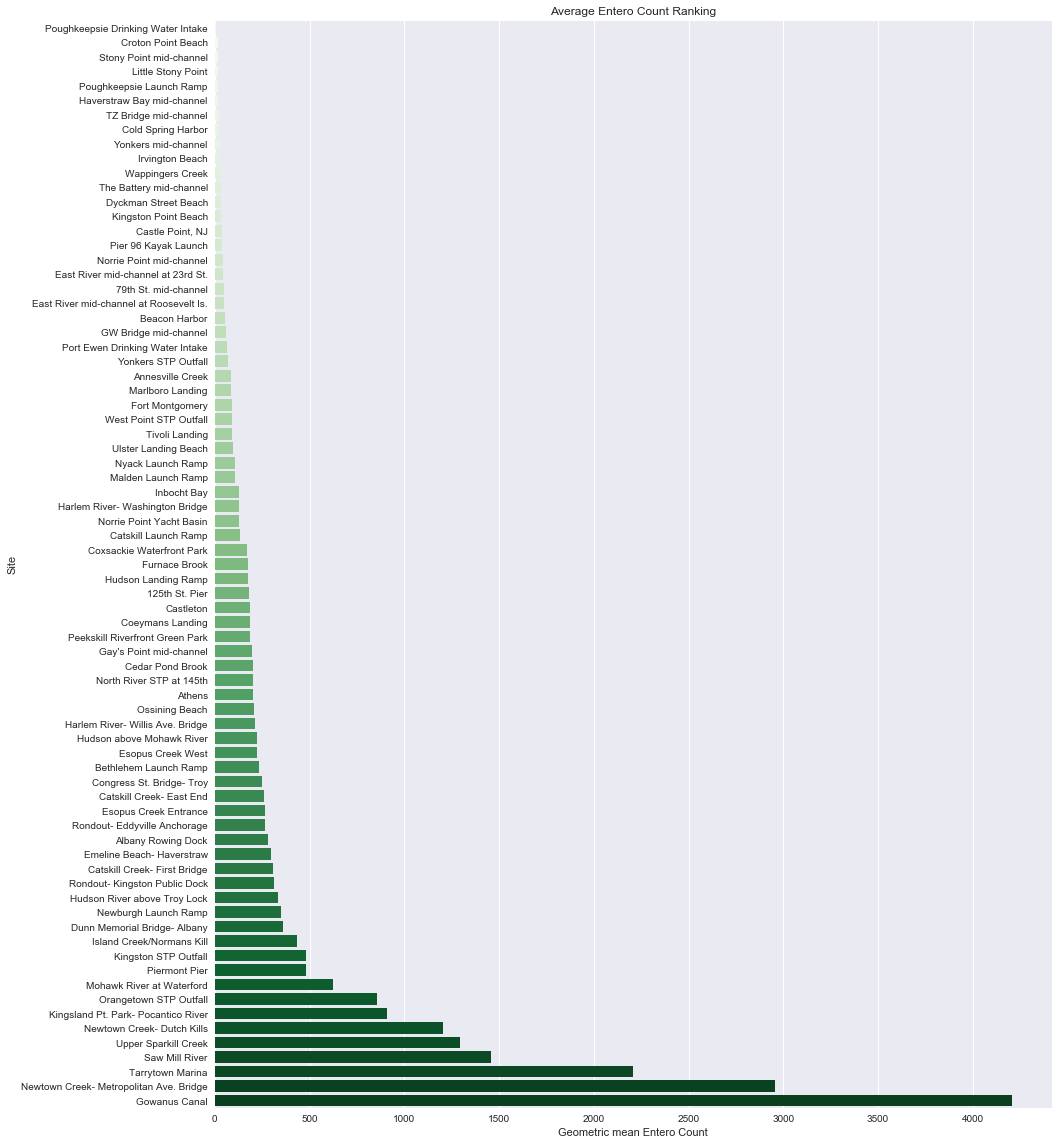

In [6]:
plt.figure(figsize=(15, 20))
ax = sns.barplot(x ="EnteroCount", y="Site", data=mean1, order=mean1['Site'].values, palette="Greens")
ax.set(xlabel='Geometric mean Entero Count', ylabel='Site')
ax.set_title('Average Entero Count Ranking')


- The testing of water quality can be sporadic. Which sites have been tested most regularly?
Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how
regularly their water quality is tested.

In [7]:
frequency = df.groupby(['Site'])['Date'].count().sort_values(ascending=False).reset_index()
frequency.head(10)

,Site,Date
0,Piermont Pier,187
1,Upper Sparkill Creek,165
2,125th St. Pier,66
3,Nyack Launch Ramp,61
4,TZ Bridge mid-channel,57
5,Newtown Creek- Dutch Kills,57
6,Newtown Creek- Metropolitan Ave. Bridge,57
7,Orangetown STP Outfall,57
8,Yonkers mid-channel,52
9,Yonkers STP Outfall,51


In [8]:
df1 = df.sort_values(['Site', 'Date'], ascending=[True, True])
df1['PreviousTest'] = df1.groupby(['Site'])['Date'].shift()
df1['DaysBwTests'] = df1['Date'] - df1['PreviousTest']
df1 = df1.dropna(subset=['PreviousTest'])

df1['DaysBwTests'] = df1['DaysBwTests'].apply(lambda x: x.days)
mean3 = df1.groupby(['Site'])['DaysBwTests'].mean().sort_values().reset_index()


mean3.head(10)



,Site,DaysBwTests
0,Upper Sparkill Creek,13.719512
1,Piermont Pier,13.747312
2,Nyack Launch Ramp,32.483333
3,125th St. Pier,39.553846
4,Rondout- Eddyville Anchorage,44.931818
5,Newtown Creek- Metropolitan Ave. Bridge,46.017857
6,Newtown Creek- Dutch Kills,46.017857
7,TZ Bridge mid-channel,46.035714
8,Orangetown STP Outfall,46.035714
9,Kingsland Pt. Park- Pocantico River,46.707317


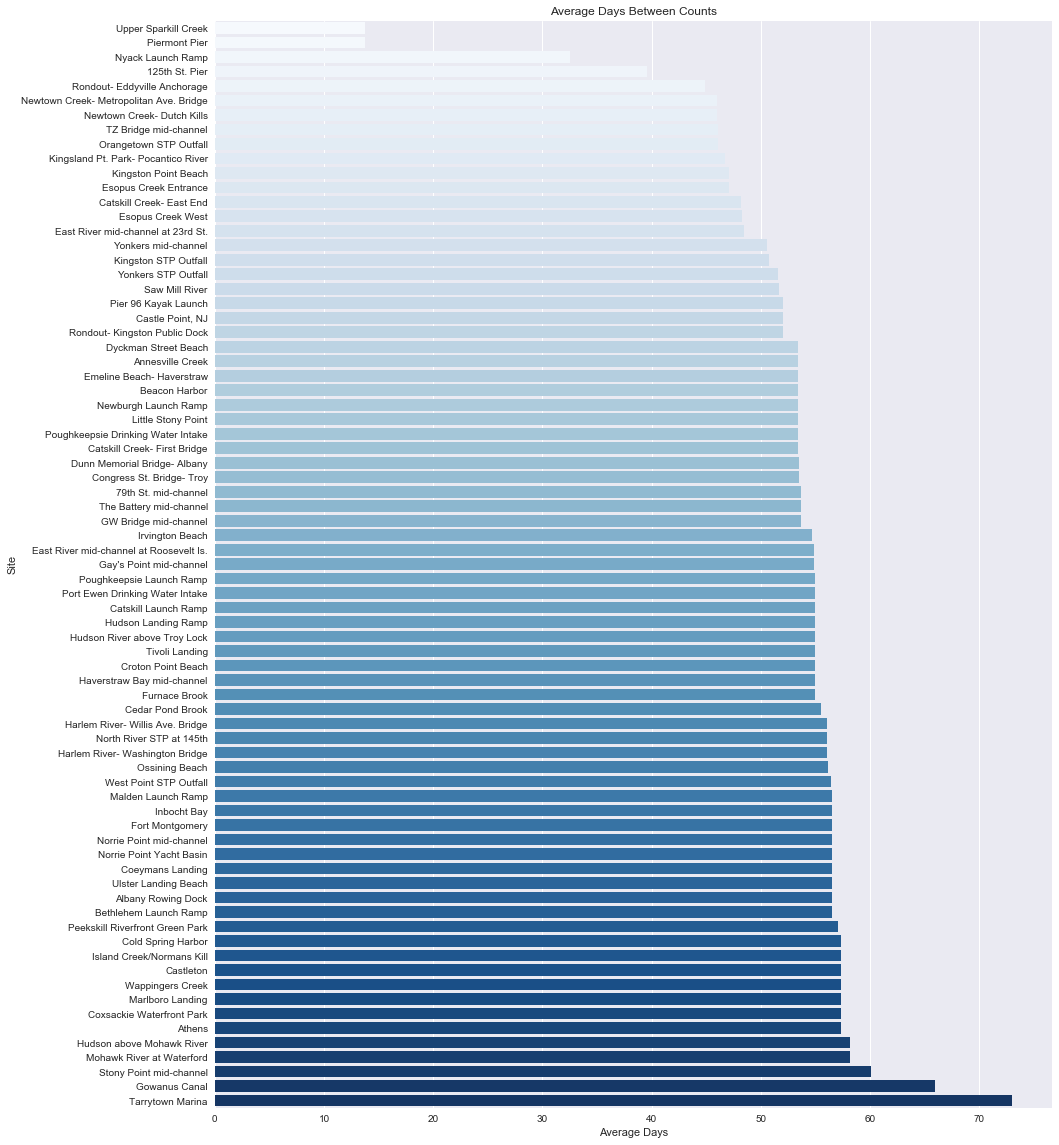

In [9]:
plt.figure(figsize=(15, 20))
ax = sns.barplot(x ="DaysBwTests", y="Site", data=mean3, order=mean3['Site'].values, palette="Blues")
ax.set(xlabel='Average Days', ylabel='Site')
ax.set_title('Average Days Between Counts')


- Is there a relationship between the amount of rain and water quality? Show this
relationship graphically. If you can, estimate the effect of rain on quality at different sites and
create a visualization to compare them.

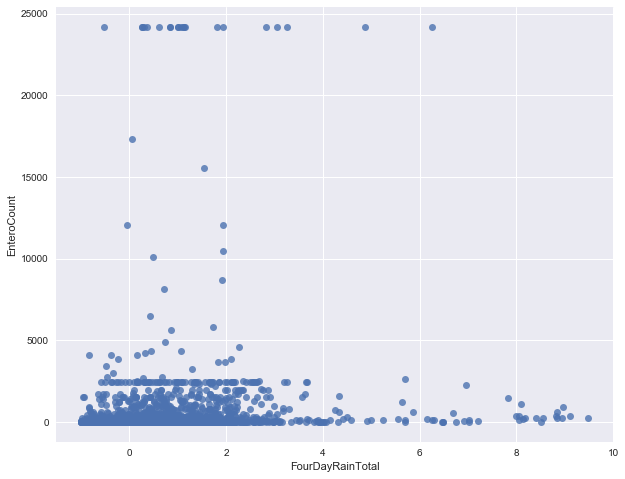

In [10]:
plt.figure(figsize=(10, 8))
sns.regplot('FourDayRainTotal', 'EnteroCount', data=df, fit_reg=False, x_jitter=1)

Besides few outliers it does not seem like there is a relatioship between rain and water quality. We will select the best and worst swim site to compare rain and water quality.

In [11]:
# Select best site
dfbest = df.groupby('Site').filter(lambda x: 'Poughkeepsie Drinking Water Intake' in x['Site'].values)

In [12]:
# Select worst site
dfworst = df.groupby('Site').filter(lambda x: 'Gowanus Canal' in x['Site'].values)

In [13]:
# Combine best and worst
frames = [dfbest, dfworst]
dfnew = pd.concat(frames)

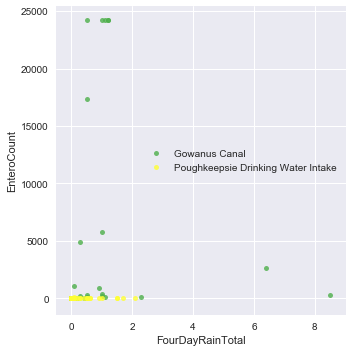

In [14]:
plt.figure(figsize=(15, 20))
sns.lmplot('FourDayRainTotal', 'EnteroCount', data=dfnew, hue='Site', palette="Set1", fit_reg=False, scatter_kws={"s": 25}, legend=False)
plt.legend(loc='center right')

We still do not see any relationship.

Reference:
https://stackoverflow.com/questions/45241221/python-pandas-calculate-average-days-between-dates